In [6]:
!pip install numpy-indexed

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_indexed as npi
from sklearn.datasets.samples_generator import make_blobs

In [0]:
class MyKMeans:
  def __init__(self, k=5, n_iter=1):
    self.k = k
    self.n_iter = n_iter
    
  def fit(self, X):
    n_samples = X.shape[0]
    init_centers_ind = np.random.randint(n_samples, size=self.k)
    centers = X[init_centers_ind, :]
    y = np.zeros(n_samples)
    
    for i in range(self.n_iter):
      dis = [np.linalg.norm(c - X, axis=1) for c in centers]
      y = np.argmin(dis, axis=0)
      centers = npi.group_by(y).mean(X)[1]
    
    self.cluster_centers_ = centers
    self.pred_ = y
    return self

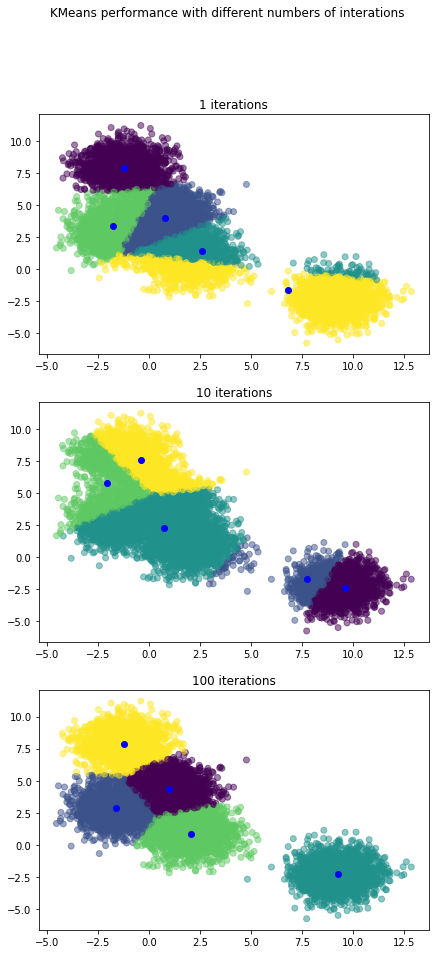

In [10]:
np.random.seed(0)
k, n_samples = 5, 10000 
X, _ = make_blobs(n_samples=n_samples, centers=k, n_features=2, random_state=0)

fig, axs = plt.subplots(3, figsize=(7, 15))
fig.suptitle('KMeans performance with different numbers of interations')

for i, n_iter in enumerate([1, 10, 100]):
  model = MyKMeans(k, n_iter).fit(X)
  y_pred = model.pred_
  centers = model.cluster_centers_

  axs[i].set_title(f'{n_iter} iterations')
  axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5);
  axs[i].scatter(centers[:, 0], centers[:, 1], c='b', label='centroids');